# EDA HIGHLIGHT - 미완

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [EDA, R]
- image: images/numpy_logo.png

# 5.1 멱승, 로그, 지수 변환에 의한 재표현

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1940    3976    5466    6234    7427   14519 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.570   8.286   8.604   8.593   8.911   9.583 

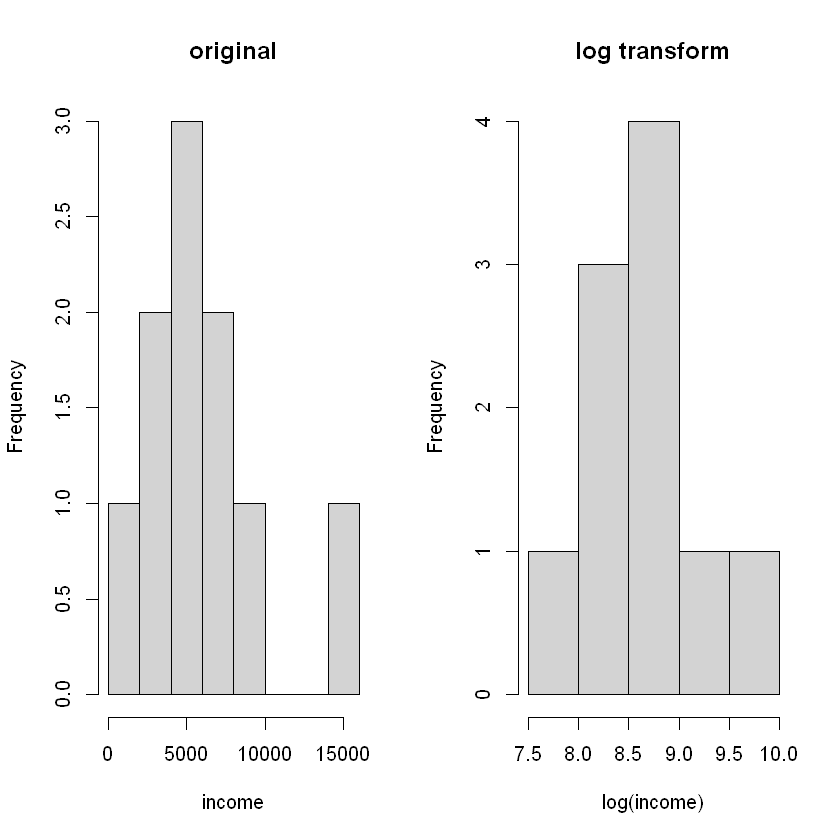

# 5.4 표준화 변환

- 표준화 변환이란 통상적으로 한 자료묶음의 `평균이 0, 표준편차가 1이 되도록 하는 선형변환`을 말한다.

$x_1, x_2, \dots, x_n$을 자료 값이라고 할 때 이것의 표준화변환 $z_1, z_2, \dots, z_n$은 다음과 같이 정한다.

$z_i = \dfrac{x_i - \bar{x}}{s_x}, \, i = 1,2, \dots,n. \qquad(1)$

그런데 (1)은 로버스트하지 않은 $\bar{x}$와 $s_x$에 의존하므로 EDA의 관점에서는 믿고 사용하기 어렵다. [^1]

- 왜냐하면 표본평균과 표본표준편차는 극단적인 이상점에 의해 크게 변동될 수 있기 때문이다.
- 그러나 중앙값 또는 사분위수범위(IQR)은 비교적 로버스트하다. 

즉, 평균 $\bar{x}$ 대신에 중앙값 $med_x$를, 표준편차 $s_x$ 대신에 사분위수범위 $IQR$을 보정한 $\tilde{\sigma_x} = \dfrac{IQR}{1.35}$을 쓰는 것이 좋을 것이다.

따라서 로버스트 표준화 변환은 다음과 같다.

$\bar{z_i} = \dfrac{x_i - med_x}{\tilde{\sigma_x}}\, i = 1,2, \dots,n. \qquad(1)$

표준화 변환을 사용하는 예시 상황은 다음과 같다.

In [1]:
#hide_input
print('A 그룹 학생 100명의 시험 X 점수는 N(40,10)으로부터 생성되었다.')
print('B 그룹 학생 90명의 시험 Y 점수는 N(40,10)으로부터, 나머지 10명의 시험 Y 점수 N(80,5)으로부터 생성되었다.')

[1] "A 그룹 학생 100명의 시험 X 점수는 N(40,10)으로부터 생성되었다."
[1] "B 그룹 학생 90명의 시험 Y 점수는 N(40,10)으로부터, 나머지 10명의 시험 Y 점수 N(80,5)으로부터 생성되었다."


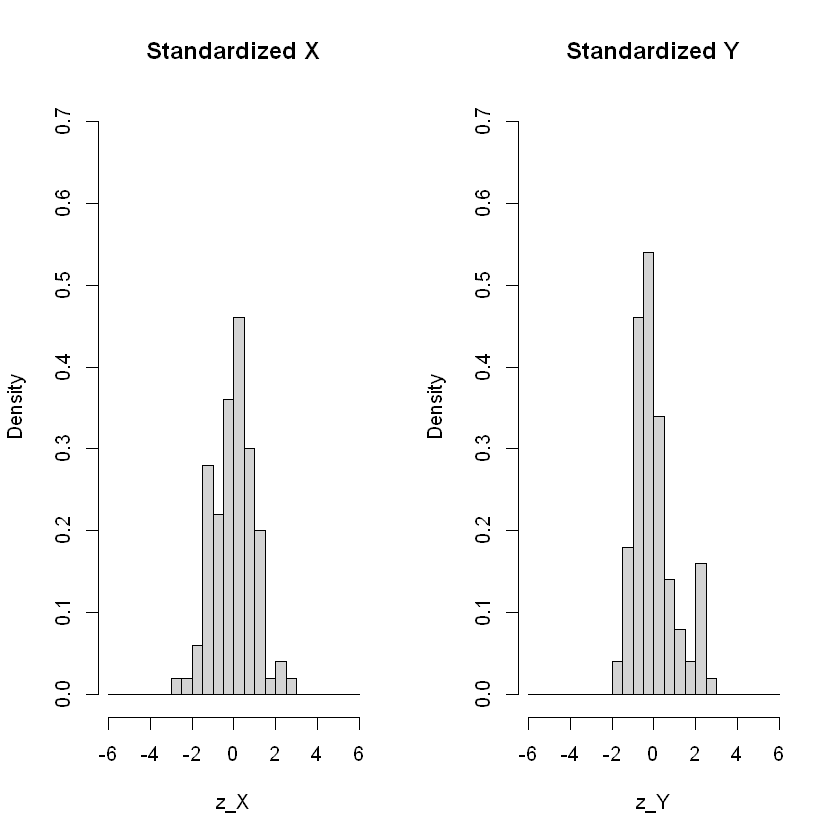

In [22]:
# 표준화 변환

par(mfrow = c(1,2))
X_group <- rnorm(100, 40, 10)
Y_group <- c(rnorm(90,40,10), rnorm(10,80,5))

z_X <- (X_group-mean(X_group))/sd(X_group)
z_Y <- (Y_group-mean(Y_group))/sd(Y_group)
hist(z_X, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Standardized X')
hist(z_Y, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Standardized Y')

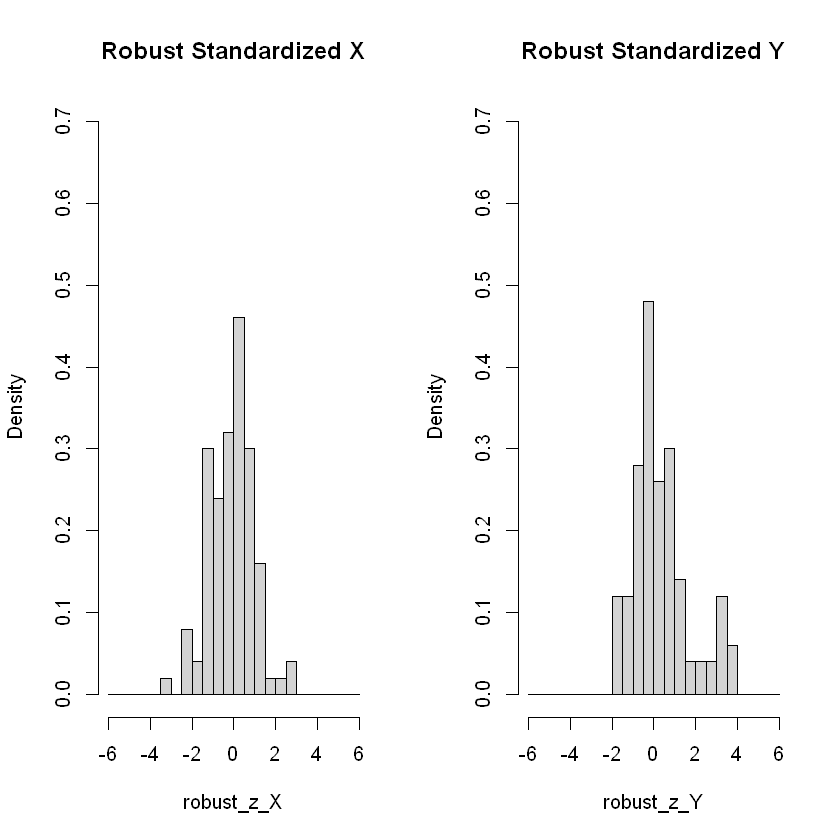

In [23]:
# 로버스트 표준화 변환

par(mfrow = c(1,2))
robust_z_X <- (X_group-median(X_group))/(IQR(X_group)/1.35)
robust_z_Y <- (Y_group-median(Y_group))/(IQR(Y_group)/1.35)
hist(robust_z_X, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Robust Standardized X')
hist(robust_z_Y, breaks = seq(-6, 6, 0.5), freq = F, ylim = c(0, 0.7), main = 'Robust Standardized Y')

# 5.5 요약

- 선형변환 $ax+b\, (a > 0)$은 분포의 형태를 바꾸지 않는다. 그러나 비선형변환은 분포의 형태를 바꾼다.

- 변환의 사다리는 $x^p$ 꼴의 파워(power, 멱승)형 변환을 일컫는데 변환의 사다리를 내려가면 $(p < 1)$ 오른쪽 꼬리가 짧아진다. $p=0$에 해당하는 변환은 로그변환이다.

- 자료의 재표현은 분포의 대칭화를 위하여, 또는 자료묶음들의 산포를 균일화하기 위한 목적으로 실행된다.

- 자료의 재표현은 자료 해석을 풍부하게 한다.

# ref ppt

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1940    3976    5466    6234    7427   14519 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.570   8.286   8.604   8.593   8.911   9.583 

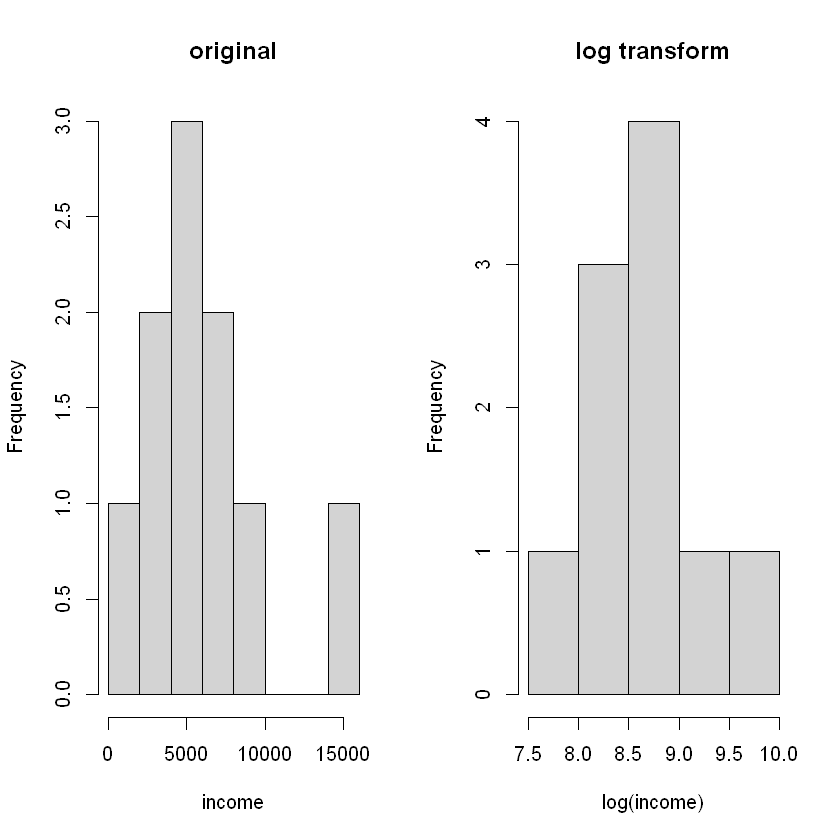

In [32]:
par(mfrow=c(1,2))
 income<-c(1940,3100,3818,4448,5088,5844,6640,7689,9257,14519)
hist(income, main = 'original')
hist(log(income), main = 'log transform')
summary(income)
summary(log(income))

- 오른쪽 꼬리가 길었으나 로그 변환으로 완화됨

In [ ]:
curve(x^(1/16), col = 'blue')
par(new=T)
curve(log(x), col = 'red')

[^1] 로버스트(robust) 한 통계량은 이상치/에러값으로 부터 영향을 크게 받지 않는 (건장한) 통계량

